In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import utils 

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounte

Tenserflow Version:  2.10.1
Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized


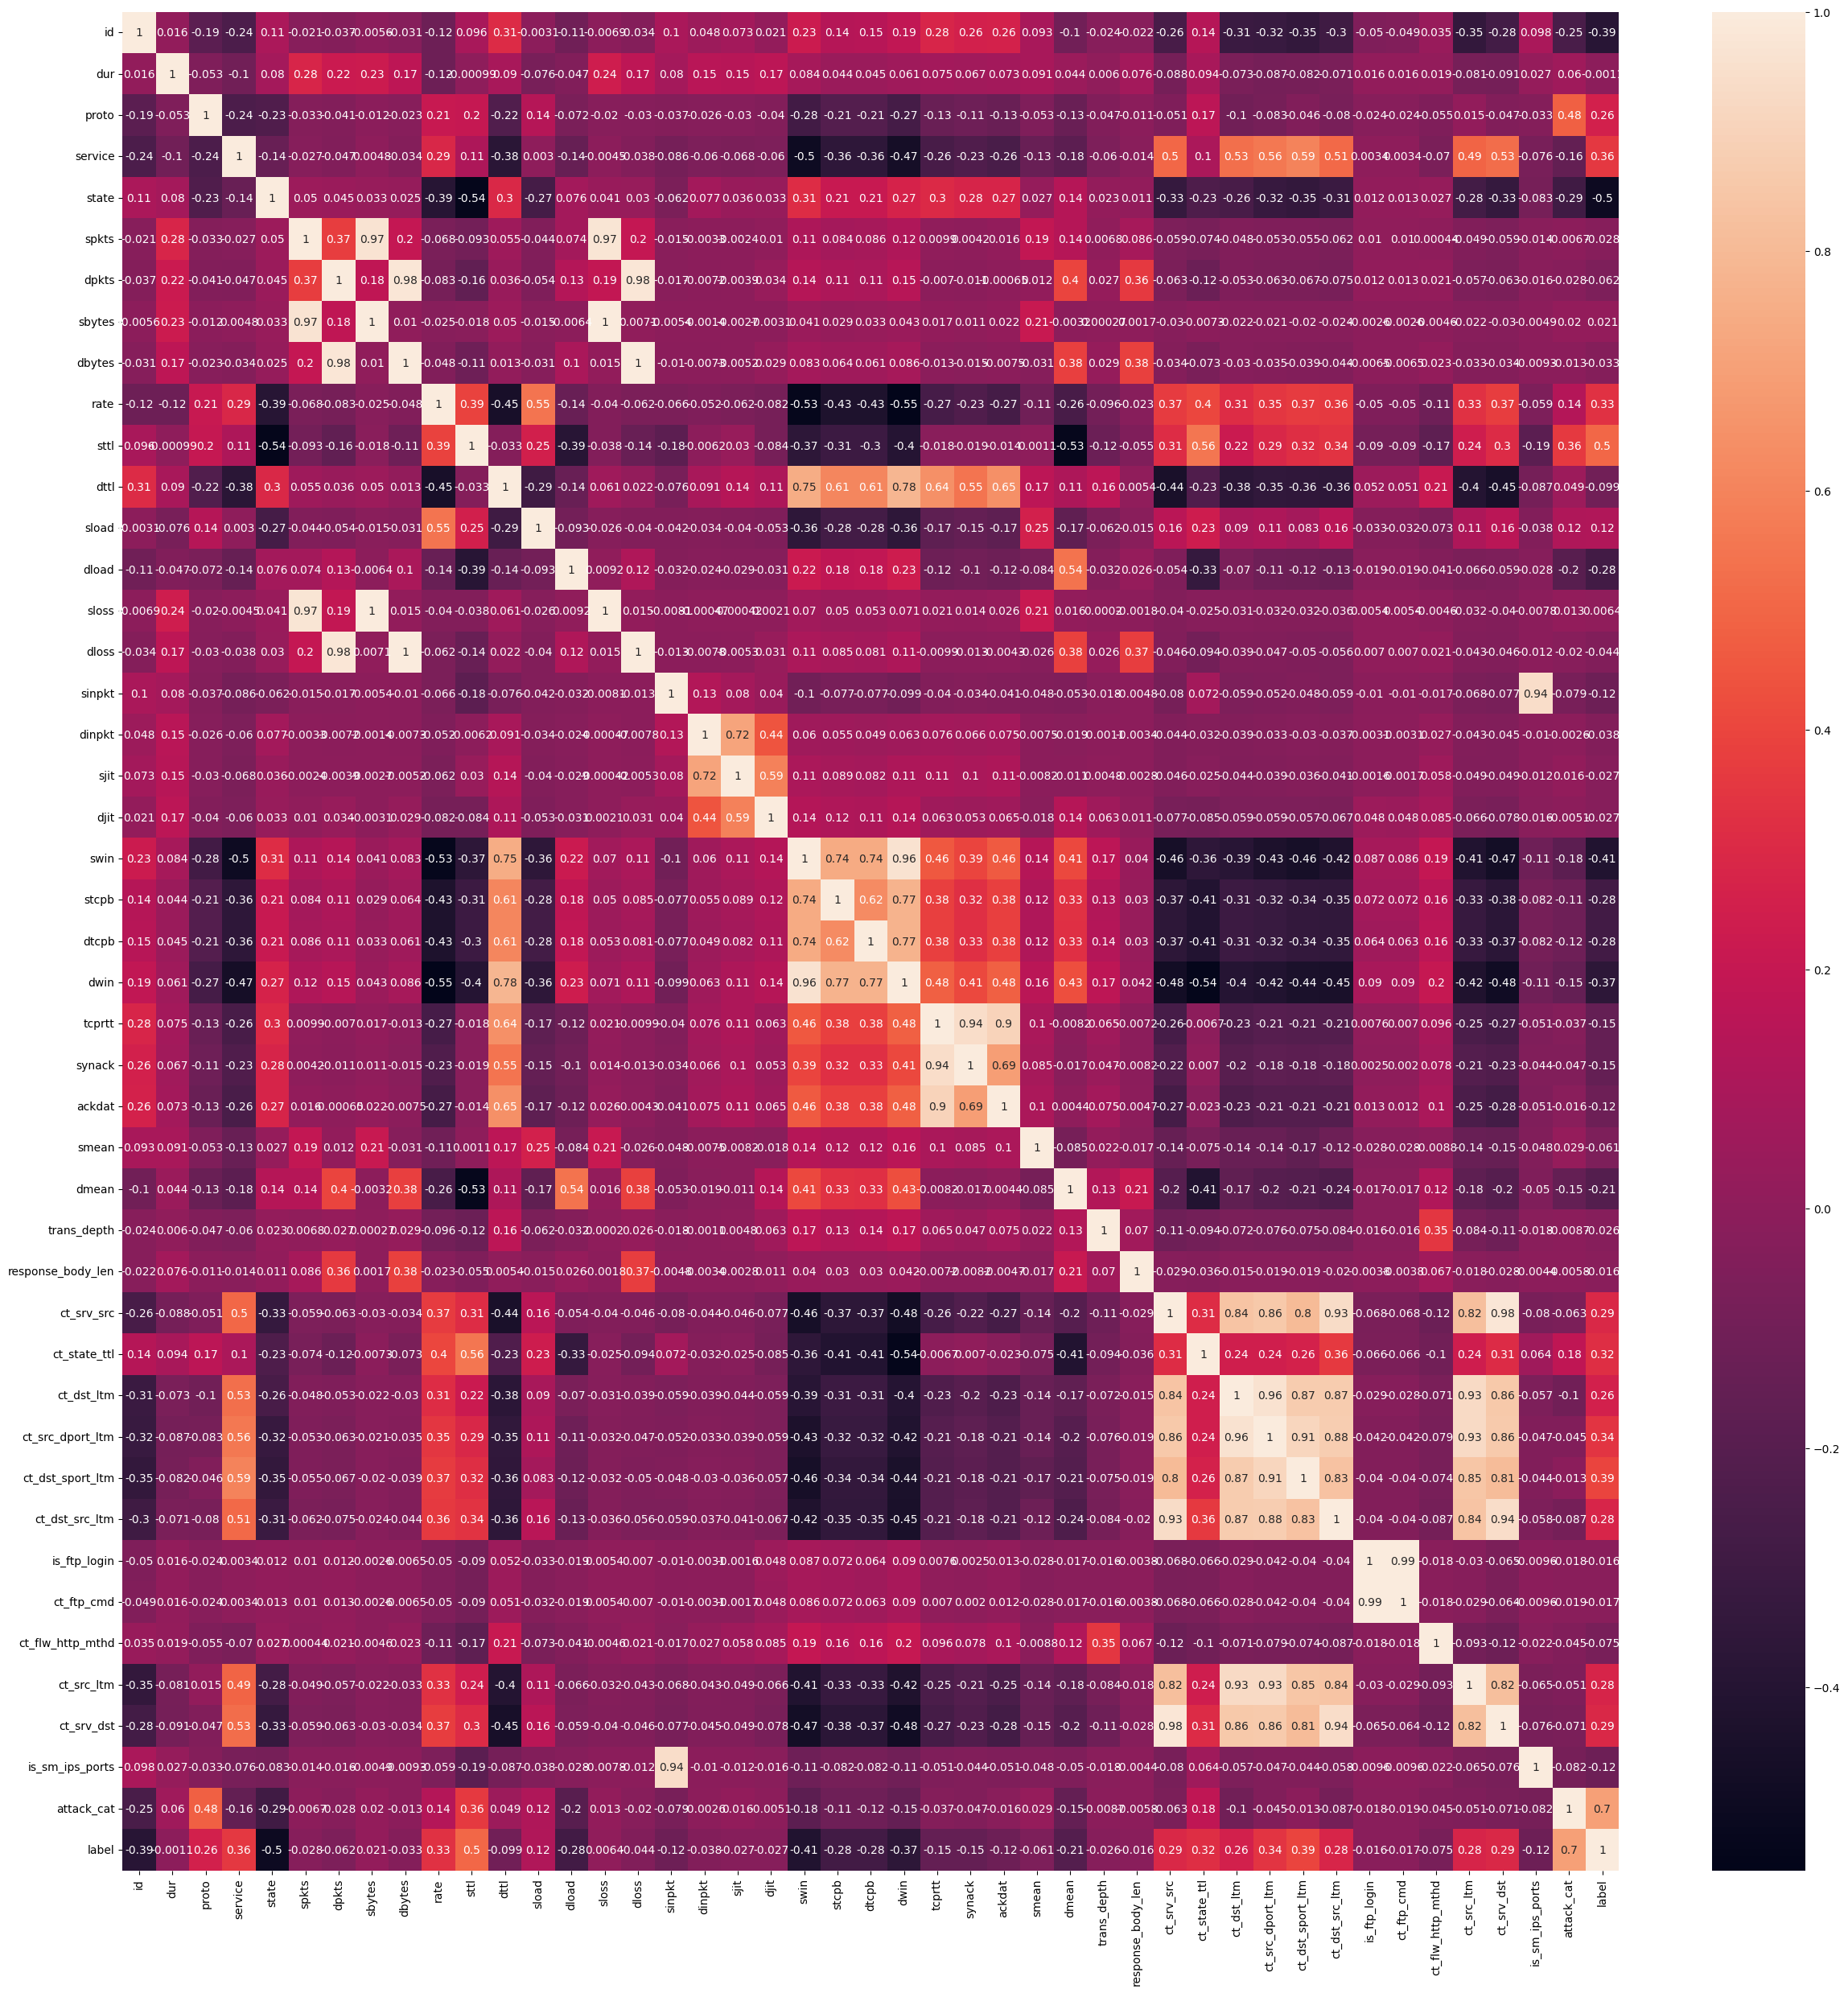

In [5]:
df = pd.read_csv("./dataset/UNSW_NB15_training-set.csv")
df = utils.feature_labelencoding(df)
plt.figure(figsize=(30, 30))
df_corr = df.corr()
sns.heatmap(df_corr, annot=True);

In [6]:
df=pd.read_csv('dataset/UNSW_NB15_training-set.csv')

In [7]:
from sklearn.model_selection import train_test_split

In [45]:
x = df
y = df['attack_cat']
x, _x, y, _y = train_test_split(x, y, random_state=189, test_size=0.1, stratify=y)

In [ ]:
_x.to_csv('./dataset/UNSW_NB15_validating-set.csv', index=False)

In [9]:
_x['attack_cat'].value_counts()

Normal            3700
Generic           1887
Exploits          1113
Fuzzers            606
DoS                409
Reconnaissance     350
Analysis            68
Backdoor            58
Shellcode           38
Worms                5
Name: attack_cat, dtype: int64

In [11]:
_x['attack_cat'].value_counts()

Normal            3700
Generic           1887
Exploits          1113
Fuzzers            606
DoS                409
Reconnaissance     350
Analysis            68
Backdoor            58
Shellcode           38
Worms                5
Name: attack_cat, dtype: int64

In [16]:
x['attack_cat'].value_counts()

3680

In [ ]:
x1, x2, y1, y2 = train_test_split(x, y, random_state=189, test_size=0.5, stratify=y)

In [ ]:
x1.to_csv('./dataset/UNSW_NB15-1.csv', index=False)

In [ ]:
x2.to_csv('./dataset/UNSW_NB15-2.csv', index=False)

In [ ]:
x1['attack_cat'].value_counts()

Normal            16650
Generic            8492
Exploits           5010
Fuzzers            2728
DoS                1840
Reconnaissance     1573
Analysis            304
Backdoor            263
Shellcode           170
Worms                19
Name: attack_cat, dtype: int64

In [ ]:
x2['attack_cat'].value_counts()

Normal            16650
Generic            8492
Exploits           5009
Fuzzers            2728
DoS                1840
Reconnaissance     1573
Analysis            305
Backdoor            262
Shellcode           170
Worms                20
Name: attack_cat, dtype: int64

In [17]:
x['attack_cat'].unique()

array(['Fuzzers', 'Normal', 'Reconnaissance', 'Generic', 'Exploits',
       'DoS', 'Backdoor', 'Worms', 'Analysis', 'Shellcode'], dtype=object)

In [24]:
type_1 = ['Generic', 'Reconnaissance', 'Backdoor', 'Analysis', 'Worms']
type_2 = ['Fuzzers', 'Exploits', 'DoS', 'Shellcode']

In [25]:
normal_list = x[x['attack_cat'] ==  'Normal']

In [26]:
list_1 = x[x['attack_cat'].isin(type_1)]

In [27]:
list_2 = x[x['attack_cat'].isin(type_2)]

In [28]:
list_1['attack_cat'].value_counts()

Generic           16984
Reconnaissance     3146
Analysis            609
Backdoor            525
Worms                39
Name: attack_cat, dtype: int64

In [29]:
list_2['attack_cat'].value_counts()

Exploits     10019
Fuzzers       5456
DoS           3680
Shellcode      340
Name: attack_cat, dtype: int64

In [30]:
normal_list_1, normal_list_2, _, __= train_test_split(normal_list, normal_list['attack_cat'], random_state=189, test_size=0.5)

In [31]:
x3 = pd.concat([normal_list_1, list_1])    

In [32]:
x4 = pd.concat([normal_list_2, list_2])    

In [20]:
from sklearn.utils import shuffle

In [34]:
x3 = shuffle(x3)
x4 = shuffle(x4)

In [35]:
x3['attack_cat'].value_counts()

Generic           16984
Normal            16650
Reconnaissance     3146
Analysis            609
Backdoor            525
Worms                39
Name: attack_cat, dtype: int64

In [36]:
x4['attack_cat'].value_counts()

Normal       16650
Exploits     10019
Fuzzers       5456
DoS           3680
Shellcode      340
Name: attack_cat, dtype: int64

In [37]:
x3.to_csv('./dataset/UNSW_NB15-3.csv', index=False)

In [38]:
x4.to_csv('./dataset/UNSW_NB15-4.csv', index=False)

In [23]:
import random

In [72]:
list_1 = x[x['attack_cat'] == False]
list_2 = x[x['attack_cat'] == False]

for label in x['attack_cat'].unique():
   list_label = x[x['attack_cat'] == label]
   x_1, x_2, _, _ = train_test_split(list_label, list_label['attack_cat'], random_state=189, test_size=random.uniform(0.1, 0.9))
   list_1 = pd.concat([list_1, x_1])
   list_2 = pd.concat([list_2, x_2])

x5 = shuffle(list_1)
x6 = shuffle(list_2)

In [73]:
x5['attack_cat'].value_counts()

Normal            26454
Exploits           6434
Fuzzers            4387
Generic            4318
DoS                2208
Reconnaissance      503
Backdoor            430
Analysis            366
Shellcode           276
Worms                23
Name: attack_cat, dtype: int64

In [74]:
x6['attack_cat'].value_counts()

Generic           12666
Normal             6846
Exploits           3585
Reconnaissance     2643
DoS                1472
Fuzzers            1069
Analysis            243
Backdoor             95
Shellcode            64
Worms                16
Name: attack_cat, dtype: int64

In [43]:
x5.to_csv('./dataset/UNSW_NB15-5.csv', index=False)

In [44]:
x6.to_csv('./dataset/UNSW_NB15-6.csv', index=False)